Xt = Noise + AutoregressivePart + MovingAveragePart

ARMA(p,q)
Xt = Noise + AR(p) + MA(q)

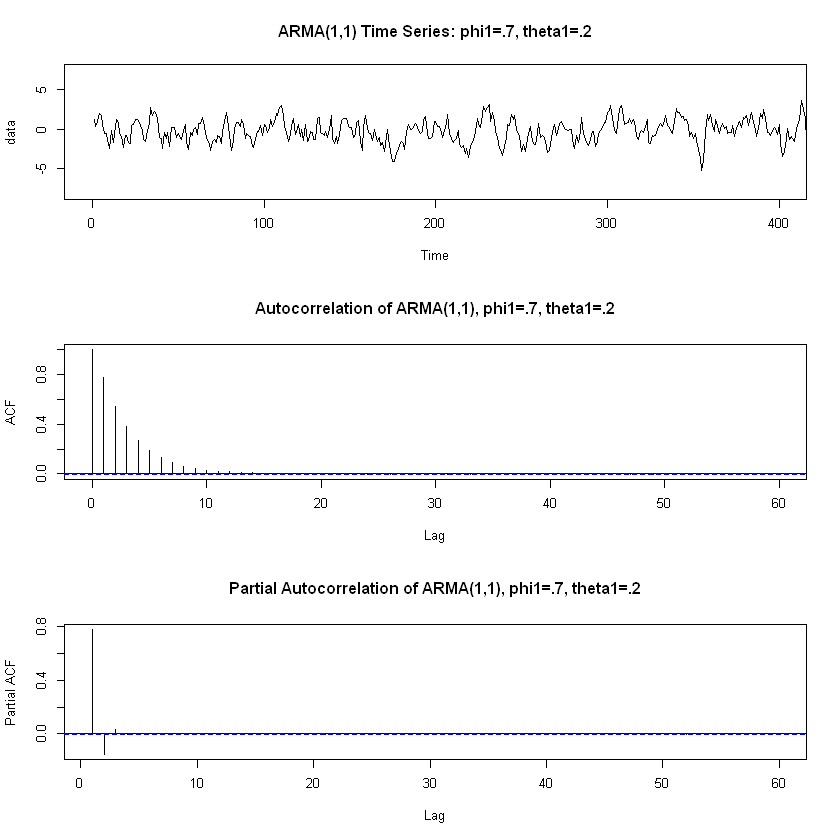

In [2]:
set.seed(500)#Beginning of Heptarchy: Kent, Essex, Sussex, # Wessex, East Anglia, Mercia, and Northumbria
data = arima.sim( list(order = c(1,0,1), ar =.7, ma=.2),n = 1000000)
par(mfcol=c(3,1))
plot(data, main="ARMA(1,1) Time Series: phi1=.7, theta1=.2", xlim=c(0,400))#first terms
acf(data, main="Autocorrelation of ARMA(1,1), phi1=.7, theta1=.2")
acf(data, type="partial", main="Partial Autocorrelation of ARMA(1,1), phi1=.7, theta1=.2")

In [3]:
data(discoveries)

In [7]:
print(discoveries)

Time Series:
Start = 1860 
End = 1959 
Frequency = 1 
  [1]  5  3  0  2  0  3  2  3  6  1  2  1  2  1  3  3  3  5  2  4  4  0  2  3  7
 [26] 12  3 10  9  2  3  7  7  2  3  3  6  2  4  3  5  2  2  4  0  4  2  5  2  3
 [51]  3  6  5  8  3  6  6  0  5  2  2  2  6  3  4  4  2  2  4  7  5  3  3  0  2
 [76]  2  2  1  3  4  2  2  1  1  1  2  1  4  4  3  2  1  4  1  1  1  0  0  2  0


In [4]:
help(discoveries)

The numbers of “great” inventions and scientific discoveries in each year from 1860 to 1959. 

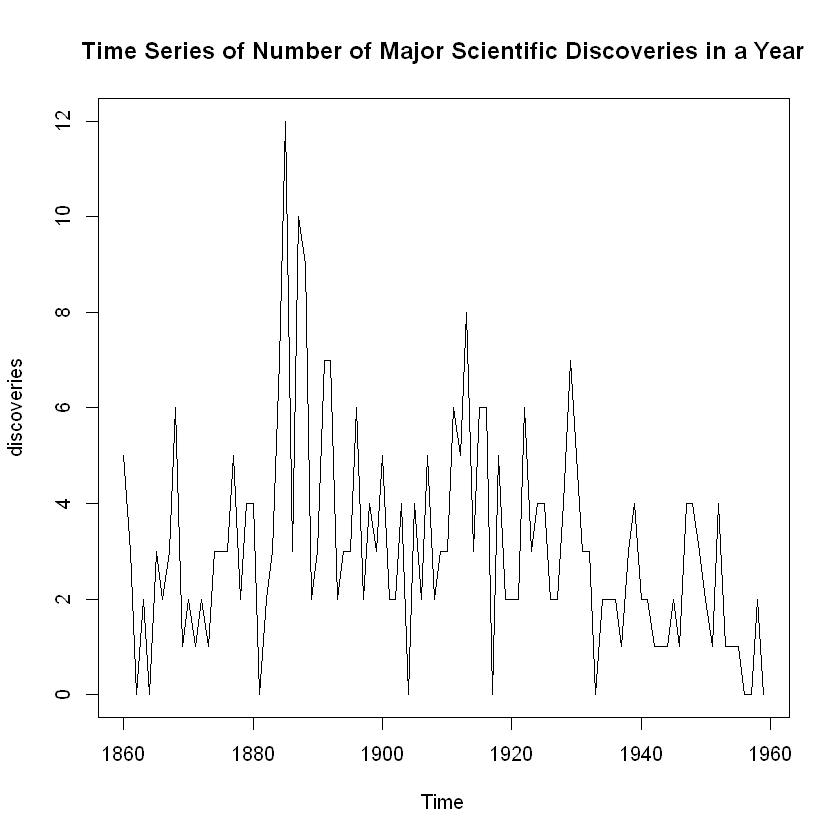

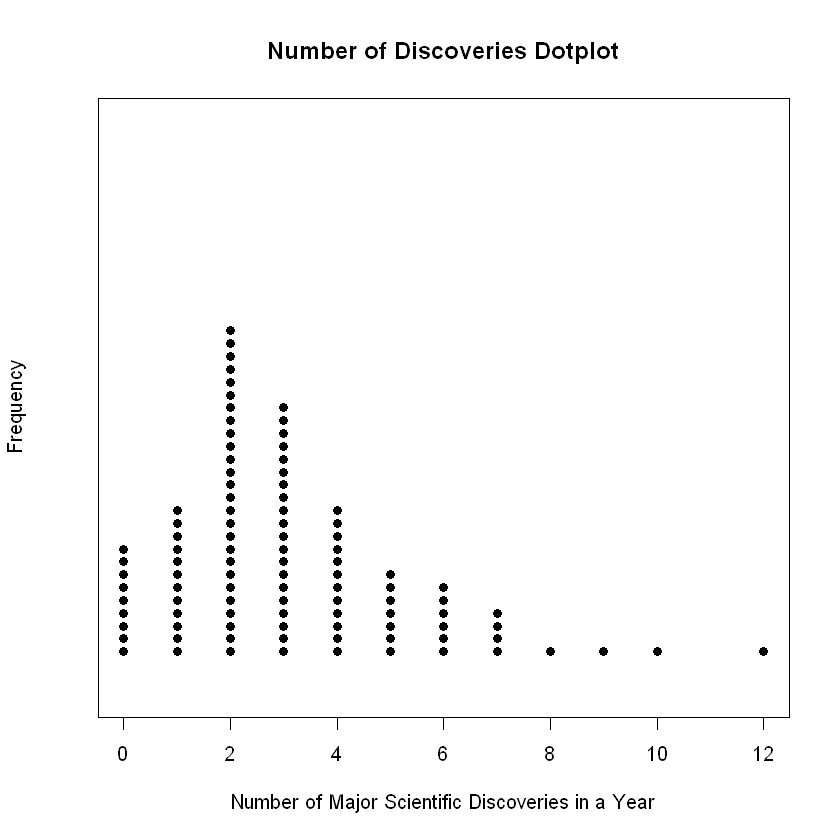

In [5]:
plot(discoveries, main = "Time Series of Number of Major Scientific Discoveries in a Year")
stripchart(discoveries, method = "stack", offset=.5, at=.15,pch=19, main="Number of Discoveries Dotplot",xlab="Number of Major Scientific Discoveries in a Year",ylab="Frequency")

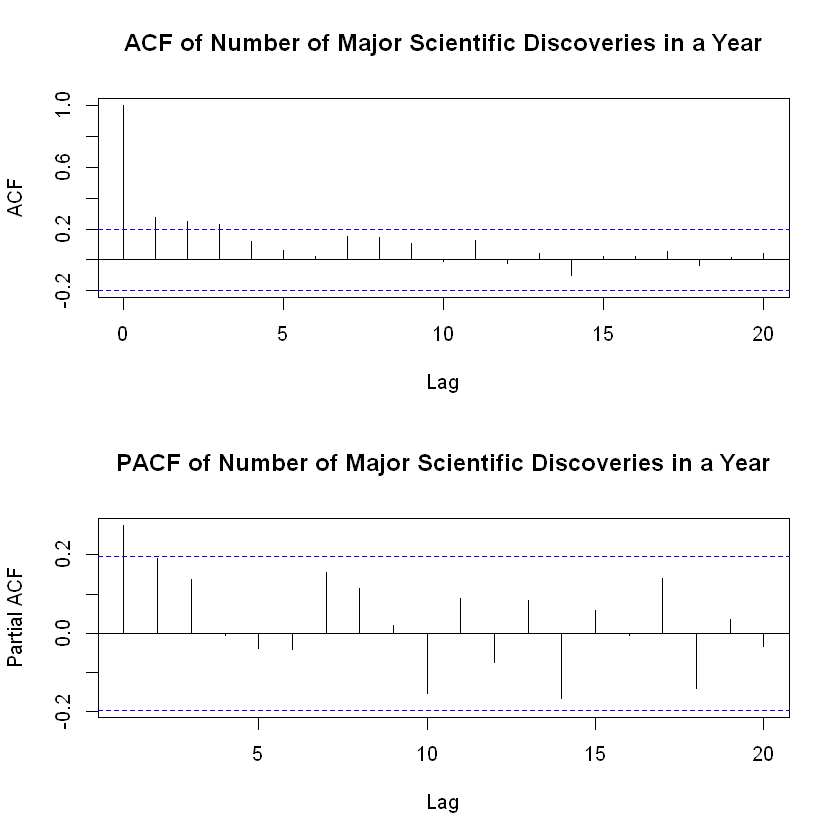

In [8]:
par(mfcol = c(2,1 ))
acf(discoveries, main="ACF of Number of Major Scientific Discoveries in a Year")
acf(discoveries, type="partial", main="PACF of Number of Major Scientific Discoveries in a Year")

In [13]:
for(i in 0:3){
    for(j in 0:3){
        print(paste("AIC(arima(discoveries, order= c(",i,",0,",j,") = ",AIC(arima(discoveries, order= c(i,0,j)))))
    }
}

[1] "AIC(arima(discoveries, order= c( 0 ,0, 0 ) =  449.329705052099"
[1] "AIC(arima(discoveries, order= c( 0 ,0, 1 ) =  445.589542150874"
[1] "AIC(arima(discoveries, order= c( 0 ,0, 2 ) =  444.674166857197"
[1] "AIC(arima(discoveries, order= c( 0 ,0, 3 ) =  441.323042626651"
[1] "AIC(arima(discoveries, order= c( 1 ,0, 0 ) =  443.379221032797"
[1] "AIC(arima(discoveries, order= c( 1 ,0, 1 ) =  440.19799673203"
[1] "AIC(arima(discoveries, order= c( 1 ,0, 2 ) =  442.042784400099"
[1] "AIC(arima(discoveries, order= c( 1 ,0, 3 ) =  442.674739350192"
[1] "AIC(arima(discoveries, order= c( 2 ,0, 0 ) =  441.615519907434"
[1] "AIC(arima(discoveries, order= c( 2 ,0, 1 ) =  442.072216744749"
[1] "AIC(arima(discoveries, order= c( 2 ,0, 2 ) =  443.702089160251"
[1] "AIC(arima(discoveries, order= c( 2 ,0, 3 ) =  441.659449031044"
[1] "AIC(arima(discoveries, order= c( 3 ,0, 0 ) =  441.56580952356"
[1] "AIC(arima(discoveries, order= c( 3 ,0, 1 ) =  443.565473386679"
[1] "AIC(arima(discoveries, order= c

In [14]:
arima( discoveries, order=c(1,0,1) )


Call:
arima(x = discoveries, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.8353  -0.6243     3.0208
s.e.  0.1379   0.1948     0.4728

sigma^2 estimated as 4.401:  log likelihood = -216.1,  aic = 440.2

# Automatic Routines

In [17]:
install.packages('forecast')


also installing the dependencies 'fracdiff', 'lmtest', 'urca', 'RcppArmadillo'



package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ashish\AppData\Local\Temp\RtmpgPD0tl\downloaded_packages


ERROR: Error in library(forcast): there is no package called 'forcast'


In [19]:
library(forecast)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


In [27]:
auto.arima(discoveries, d=0, approximation=FALSE)

Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 estimated as 4.538:  log likelihood=-216.1
AIC=440.2   AICc=440.62   BIC=450.62

In [29]:
auto.arima(discoveries, d=0, ic="bic", approximation=FALSE)

Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 estimated as 4.538:  log likelihood=-216.1
AIC=440.2   AICc=440.62   BIC=450.62

In [31]:
auto.arima(discoveries, d=0, ic="aic", approximation=FALSE)

Series: discoveries 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3    mean
      0.1967  0.1613  0.1451  3.0637
s.e.  0.0995  0.0998  0.1007  0.4136

sigma^2 estimated as 4.556:  log likelihood=-215.78
AIC=441.57   AICc=442.2   BIC=454.59

In [32]:
library(astsa)


Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas



In [ ]:
auto.arima()